# Features in OLED devices

To fabricate OLED devices, there are various materials that are being used. Different materials are used for hole transporting layer(HTL), hole injection layer(HIL), buffer layer, electron transport layer(ETL), emissive layer(EML) and few others. There are many combination of the material and several architecture used in fabricating these devices. For this model, I am focusing on the materials for BLUE OLED.


Now, let's take a look at the features used for our regression model. 
Every material has a distinct property. However each material has their own energy level, the lowest unoccupied molecular orbital(LUMO) and highest occupied molecular orbital(HOMO) that can be measured. Another parameter that can be changed is the thickness of each layer. So, these three features are going to be considered for our model.  

Let's import some dependencies first.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from pandas.tools.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# change directory to excel file and read excel file
os.chdir('C:/Anaconda3/projects/oled')
df = pd.read_excel('oled.xlsx', sheetname='features')
#fill the missing data
df = df.fillna(value=0)
X = df[list(df.columns)[:-2]]
X.head()

,lumo_1,homo_1,lumo_2,homo_2,lumo_3,homo_3,LUMO,HOMO,lumo5,homo5,...,t3,thick,t5,t6,t7,t8,triplet1,triplet2,triplet3,label
0,3.3,5.2,2.0,5.8,2.4,5.9,1.09,5.34,2.5,6.8,...,10.0,25,5.0,30.0,1.5,200,3.00,2.91,3.36,10-30
1,5.7,9.5,2.0,5.8,0.0,0.0,2.02,5.56,0.0,0.0,...,0.0,20,0.0,45.0,2.0,120,2.87,0.00,2.75,30-50
2,2.3,5.3,2.0,5.6,0.0,0.0,2.40,5.90,0.0,0.0,...,0.0,20,0.0,45.0,1.0,100,2.87,3.00,2.75,10-30
3,3.3,5.2,0.0,0.0,0.0,0.0,2.70,5.71,0.0,0.0,...,0.0,50,0.0,0.0,1.0,100,0.00,0.00,0.00,<10
4,3.3,5.2,2.7,5.8,0.0,0.0,2.02,5.35,0.0,0.0,...,0.0,30,0.0,30.0,1.0,200,2.60,2.60,2.60,<10


There is a lot of missing data since devices have different number of layers. Some devices use 2 different layers for charge transport (HTL and ETL) and some devices don't even have some of the layers. Therefore, there are lots of zeros in the dataframe.


In [3]:
# let's look at y
Y = df['cd/A']
Y.head()

0    28.24
1    40.80
2    26.30
3     3.38
4     1.00
Name: cd/A, dtype: float64

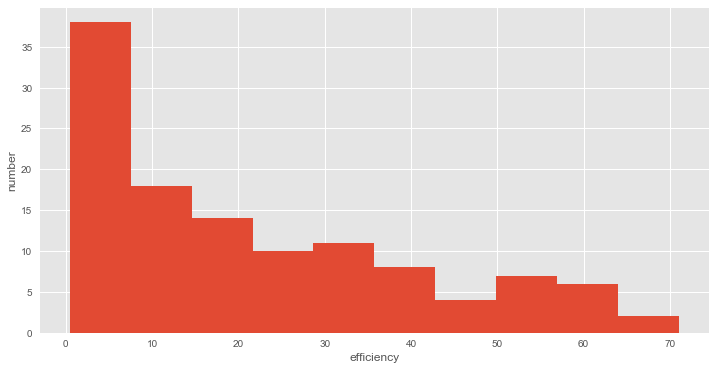

In [4]:
# device efficiency distribution
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.ylabel('number')
plt.xlabel('efficiency')
Y.hist()

From the above graph, we can observe that most of our data has efficiency less than 10 Cd/A and the distribution is not normal distribution. It is skewed to the left.

Let's take a look at the distribution of the features as well. They are denoted by X below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E34CED518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025E368F92B0>]], dtype=object)

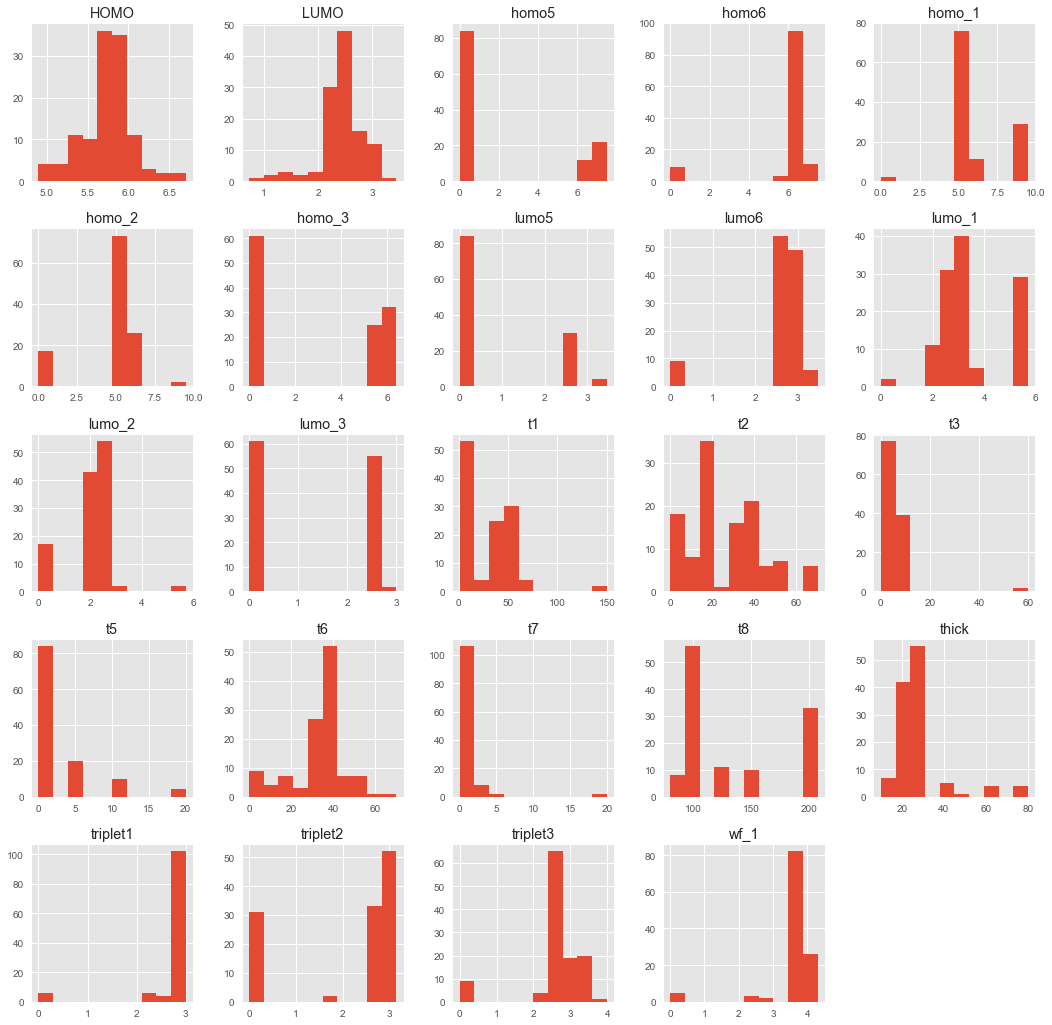

In [5]:
X = df[list(df.columns)[:-3]]
plt.rcParams['figure.figsize'] = (18.0, 18.0)
X.hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E37503FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025E37E73860>]], dtype=object)

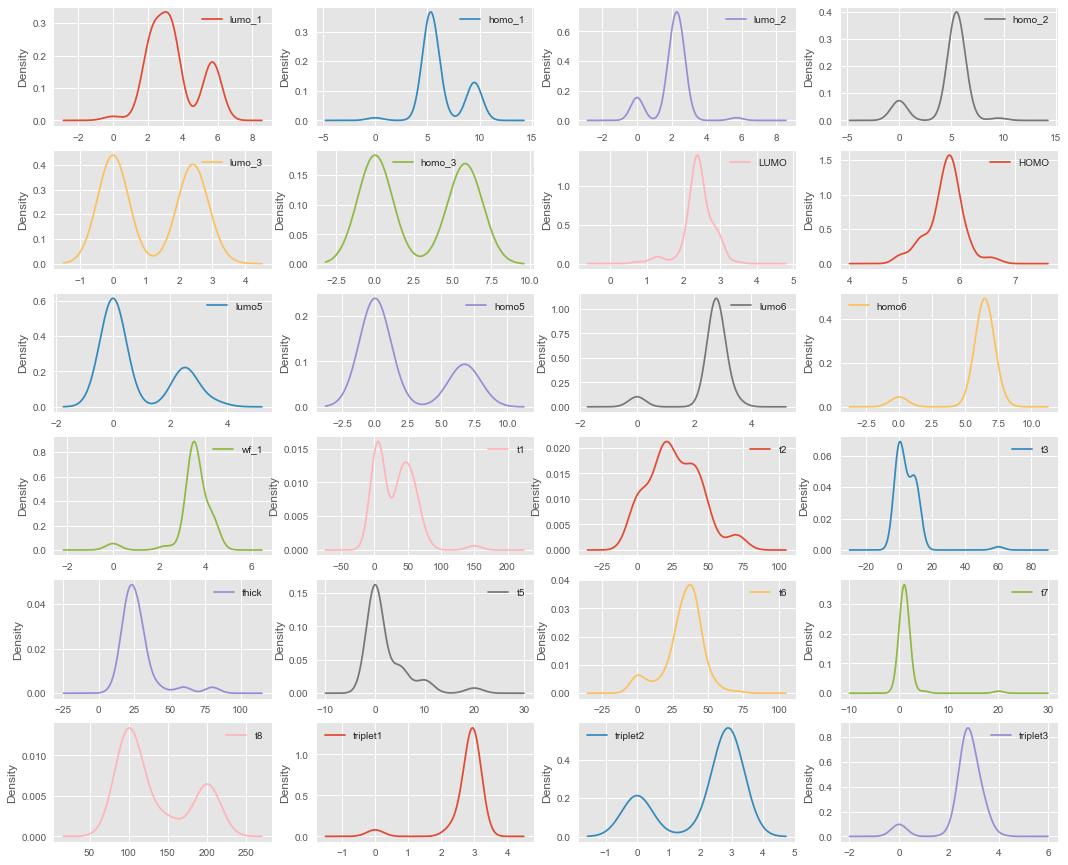

In [6]:
# we can also see the density of the distribution plot
X.plot(kind='density', subplots=True, layout=(7,4), sharex=False);

Based on the data, we can observe how the features correlate with efficiency.

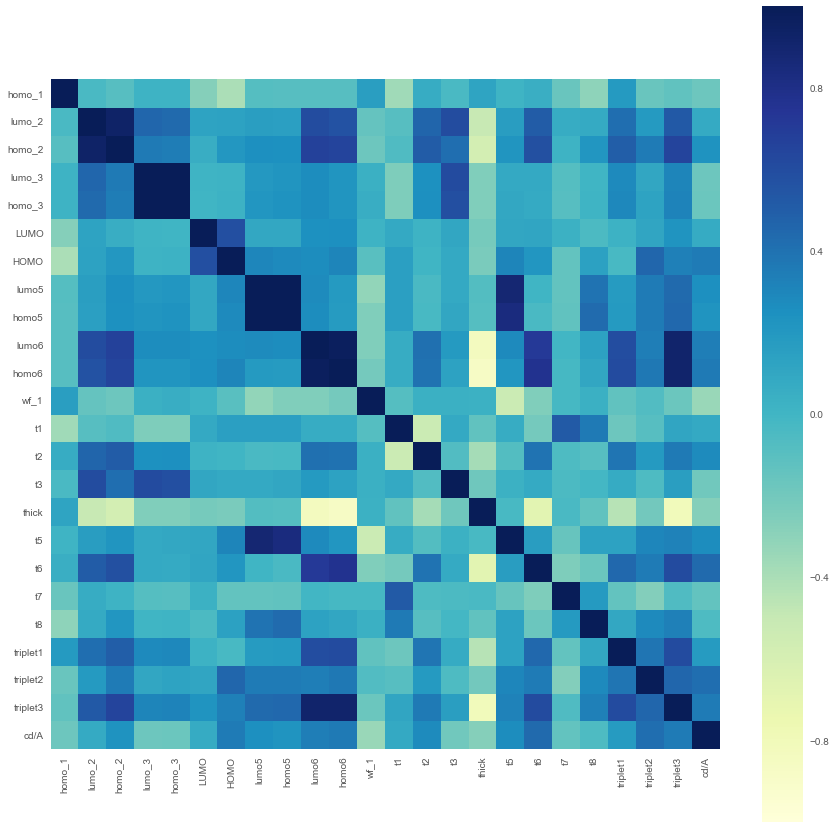

List the features in descending order of their correlation with cd/A:

t6:   0.4401725145413744
triplet2:   0.42004926443183904
homo6:   0.3633866255548747
HOMO:   0.3560975332102887
triplet3:   0.35476828901048324
wf_1:   -0.342642163255854
lumo6:   0.33775200397077787
t2:   0.27785169383045116
t5:   0.2725894925430061
thick:   -0.2708890127804538
lumo5:   0.25316839185876133
homo_2:   0.23709723652724904
homo5:   0.2279782624764628
t3:   -0.19249913637144722
triplet1:   0.18126793912392308
lumo_3:   -0.1796377261260704
homo_1:   -0.17864199665139655
homo_3:   -0.167117827233066
t7:   -0.13611715681357683
t1:   0.0868524399397329
lumo_2:   0.08224809305627327
LUMO:   0.07041936662527028
t8:   -0.05242596113929032


In [7]:
# See correlation of features with each other and with efficiency
X = df[list(df.columns)[:-3] + ['cd/A']]
corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', annot=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

We can see that HOMO level and thickness of layer 6 (t6, thickness of ETL) correlate the most with the efficiency. On the other hand, LUMO and lumo_2 correlate the least.

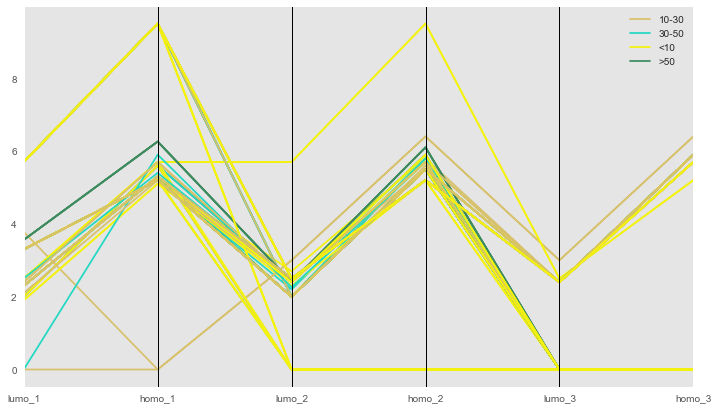

In [8]:
df1 = df.iloc[:,:6] 
label = df['label']
df1['label'] = label

plt.rcParams['figure.figsize'] = (12,7) 
parallel_coordinates(df1, 'label')
plt.show()

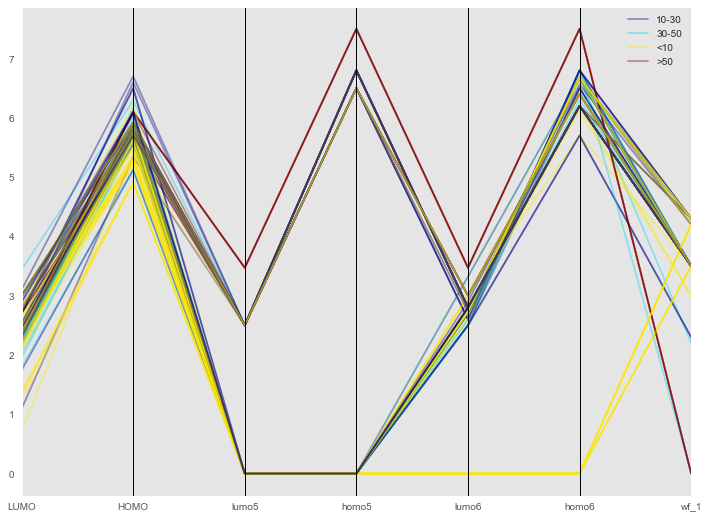

In [13]:
df2 = df.iloc[:,6:13]
label = df['label']
df2['label'] = label
plt.rcParams['figure.figsize'] = (12,9)
parallel_coordinates(df2, 'label', alpha=0.4, colormap='jet')
plt.show()

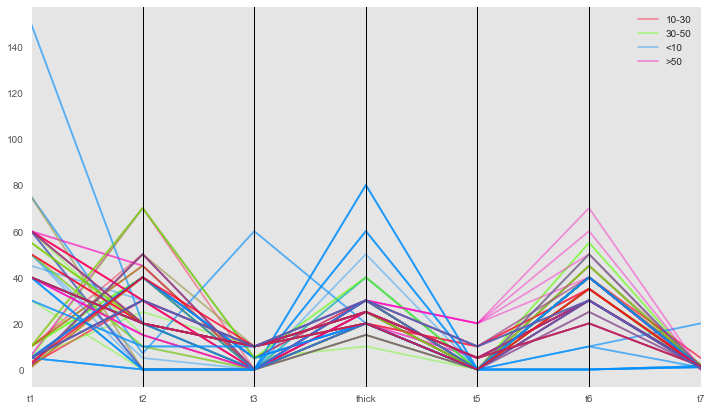

In [10]:
df3 = df.iloc[:,13:20]
label = df['label']
df3['label'] = label
plt.rcParams['figure.figsize'] = (12,7)
parallel_coordinates(df3, 'label', alpha=0.4, colormap='gist_rainbow')
plt.show()

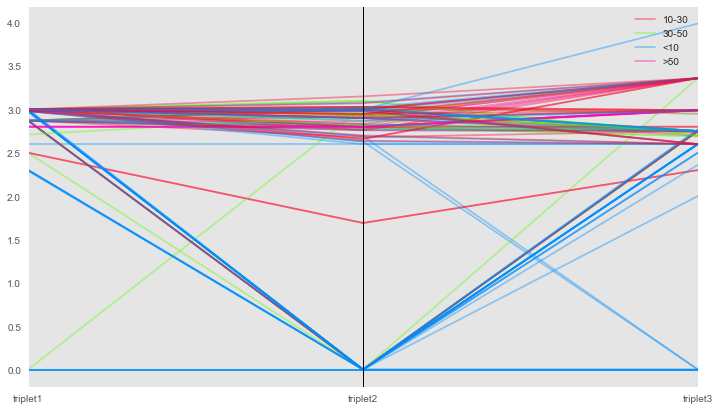

In [11]:
df4 = df.iloc[:,21:24]
label = df['label']
df4['label'] = label
plt.rcParams['figure.figsize'] = (12,7)
parallel_coordinates(df4, 'label', alpha=0.4, colormap='gist_rainbow')
plt.show()